# Import Libraries

In [72]:
# To store data
import pandas as pd

# To connect to postgresql
import psycopg2

# To get plots
import matplotlib.pyplot as plt

# To get nicer plots
import seaborn as sns

# Connection

In [73]:
def conn():
    conn = psycopg2.connect("user='postgres' host='192.168.0.2' password='geheim' dbname=tankerkoenig16")
    return conn.cursor()

# Explore All Gas Stations

In [76]:
cur = conn()
cur.execute('select * from gas_station')
data = cur.fetchall()

columns = ['id', 'version', 'verion_time', 'name', 'brand', 'Street', 'house_number', 'post_code', 'place', 'public_holiday_identifier', 'lat', 'lng', 'price_in_import', 'price_change', 'open_ts', 'ot_json', 'station_in_import', 'first_active']
ts = pd.DataFrame(data, columns=columns)
print('Shape: {}'.format(ts.shape))
ts.head()

Shape: (15380, 18)


,id,version,verion_time,name,brand,Street,house_number,post_code,place,public_holiday_identifier,lat,lng,price_in_import,price_change,open_ts,ot_json,station_in_import,first_active
0,00060898-0001-4444-8888-acdc00000001,0,2018-07-19 00:00:24.363,BFT Tankstelle Michael Richter,BFT Tankstelle Michael Richter,Messdornstr.,2,33106,Paderborn,None,51.730938,8.691739,2018-07-20 03:16:06+02:00,2018-07-19 20:42:07+02:00,-1532059200,"{""openingTimes"":[{""applicable_days"":63,""period...",2018-07-20 00:00:34+02:00,2014-03-18 16:45:31+01:00
1,00061262-0002-4444-8888-acdc00000002,0,2018-07-19 00:00:18.765,Habitzki,,Bestwiger Str.,3a,59909,Bestwig,None,51.344788,8.408037,2018-07-20 03:16:06+02:00,2018-07-19 20:33:08+02:00,1,{},2018-07-20 00:00:34+02:00,2014-03-18 16:45:31+01:00
2,00305122-bce8-497d-a760-64a2cf51f2ca,21,2018-07-08 12:41:30.000,Guenther Tank,bft,Ammersche Landstraße,45,99974,Mühlhausen,None,51.226600,10.454900,2018-07-20 03:16:06+02:00,2018-07-19 23:27:06+02:00,1,{},2018-07-20 00:00:34+02:00,2014-03-18 16:45:31+01:00
3,005056ba-7cb6-1ed2-bceb-60512dc8cd1b,1565,2018-07-19 22:50:13.292,star Tankstelle,STAR,Bornumer Strasse,141,30453,Hannover,None,52.352160,9.692820,2018-07-20 03:16:06+02:00,2018-07-19 17:57:06+02:00,-1532066400,"{""openingTimes"":[{""applicable_days"":63,""period...",2018-07-20 00:00:34+02:00,2014-03-18 16:45:31+01:00
4,005056ba-7cb6-1ed2-bceb-641db1c24d1d,1565,2018-07-19 22:50:11.655,star Tankstelle,STAR,Brunsbütteler Damm,82-102,13581,Berlin,None,52.534250,13.184600,2018-07-20 03:16:06+02:00,2018-07-19 17:57:06+02:00,1,{},2018-07-20 00:00:34+02:00,2014-03-18 16:45:31+01:00


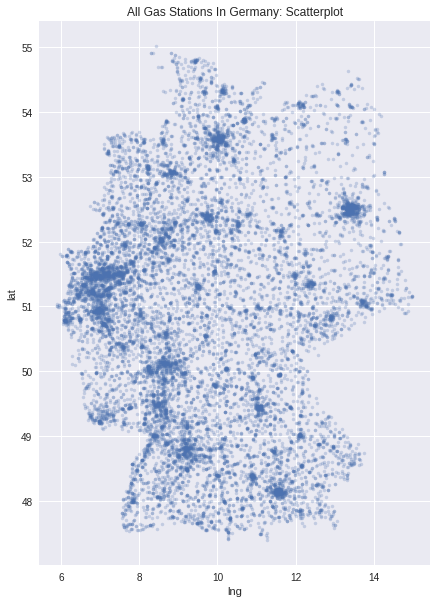

In [123]:
lat, lng = zip(*ts[(ts['lat']!=0) & (ts['lng']!=0)][['lat', 'lng']].values)

title = 'All Gas Stations In Germany: Scatterplot'
plt.figure(figsize=(7, 10))
plt.plot(lng, lat, '.', alpha=0.25)
plt.title(title)
plt.xlabel('lng')
plt.ylabel('lat')
plt.savefig('build/{}.png'.format(title.replace(' ', '_')))
plt.show()

/home/jm/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


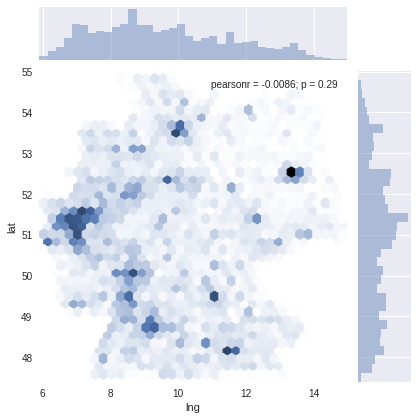

In [122]:
title = 'All Gas Stations In Germany: Hexplot'
sns.jointplot(x='lng', y='lat', data=ts[(ts['lat']!=0) & (ts['lng']!=0)], kind='hex')
plt.savefig('build/{}.png'.format(title.replace(' ', '_')))
plt.show()

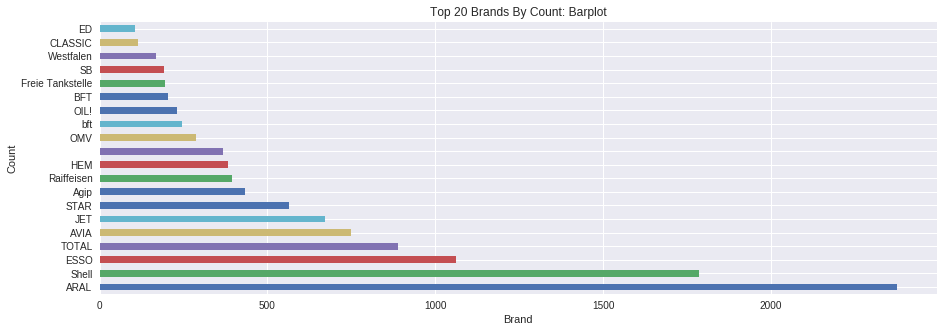

In [124]:
title = 'Top 20 Brands By Count: Barplot'
plt.figure(figsize=(15,5))
ts['brand'].value_counts()[:20].plot(kind='barh')
plt.title(title)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.savefig('build/{}.png'.format(title.replace(' ', '_')))
plt.show()

# Explore A Single Gas Stations Diesel Price

In [109]:
cur = conn()
cur.execute("select diesel, date from gas_station_information_history where stid='2d21eb22-bb59-4a68-b258-45dc6f1b0d18'")
data = cur.fetchall()

columns = ['diesel', 'date']
pr = pd.DataFrame(data, columns=columns)
pr['date'] = pd.to_datetime(pr['date'], utc=True)
pr.set_index('date', inplace=True)
print('Shape: {}'.format(pr.shape))
pr.head()

Shape: (10302, 1)


,diesel
date,
2016-10-15 13:50:07+00:00,1179
2016-10-15 13:58:31+00:00,1169
2016-05-01 19:26:06+00:00,1049
2016-05-01 20:01:01+00:00,1199
2016-05-02 03:29:01+00:00,1109


In [125]:
print('First Entry:\t{}'.format(pr.index.min()))
print('Last Entry:\t{}'.format(pr.index.max()))

First Entry:	2016-05-01 19:26:06+00:00
Last Entry:	2018-07-19 20:28:07+00:00


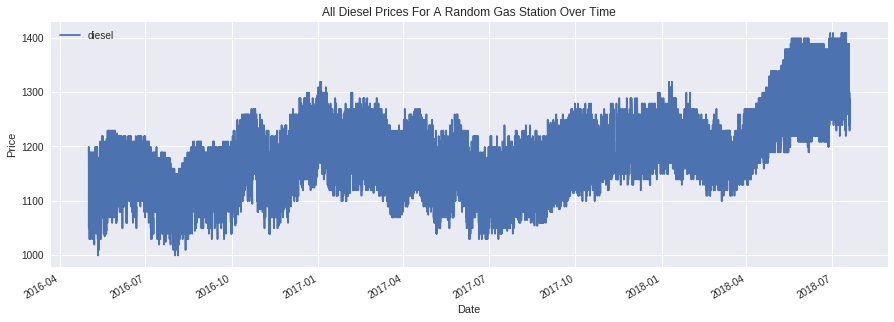

In [132]:
title = 'All Diesel Prices For A Random Gas Station Over Time'
pr.plot(figsize=(15,5))
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig('build/{}.png'.format(title.replace(' ', '_')))
plt.show()

In [152]:
day_price = pr.groupby(pd.TimeGrouper('d')).agg({'diesel':['count', 'mean', 'std', 'max', 'min', lambda x: x.max()-x.min()]})
day_price.columns = day_price.columns.get_level_values(1)
day_price.head()

/home/jm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


,count,mean,std,max,min,<lambda>
date,,,,,,
2016-05-01 00:00:00+00:00,2,1124.000000,106.066017,1199.0,1049.0,150.0
2016-05-02 00:00:00+00:00,7,1083.285714,55.334481,1189.0,1029.0,160.0
2016-05-03 00:00:00+00:00,9,1082.333333,43.874822,1189.0,1029.0,160.0
2016-05-04 00:00:00+00:00,8,1081.500000,47.132033,1189.0,1039.0,150.0
2016-05-05 00:00:00+00:00,7,1096.142857,49.569576,1189.0,1029.0,160.0


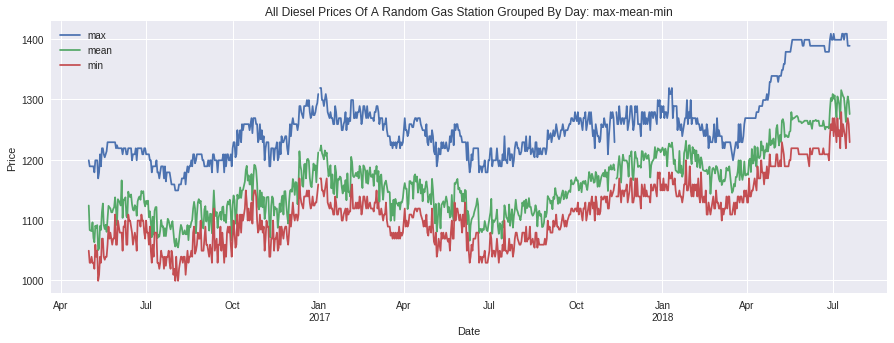

In [166]:
title = 'All Diesel Prices Of A Random Gas Station Grouped By Day: max-mean-min'
day_price[['max', 'mean', 'min']].plot(figsize=(15, 5))
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig('build/{}.png'.format(title.replace(' ', '_')))
plt.show()

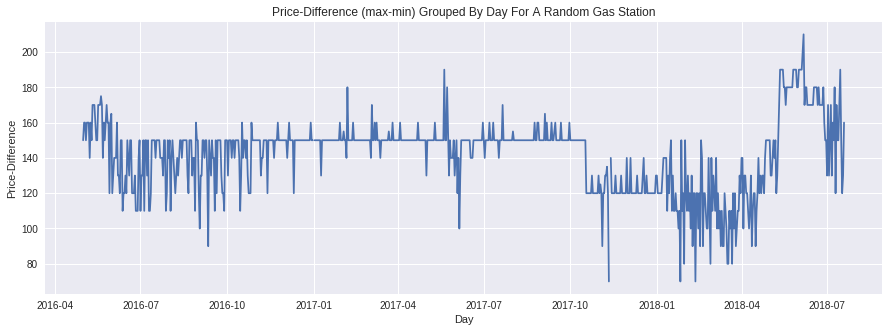

In [174]:
title = 'Price-Difference (max-min) Grouped By Day For A Random Gas Station'
plt.figure(figsize=(15,5))
plt.plot(day_price['<lambda>'])
plt.title(title)
plt.xlabel('Day')
plt.ylabel('Price-Difference')
plt.savefig('build/{}.png'.format(title.replace(' ', '_')))
plt.show()

/home/jm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


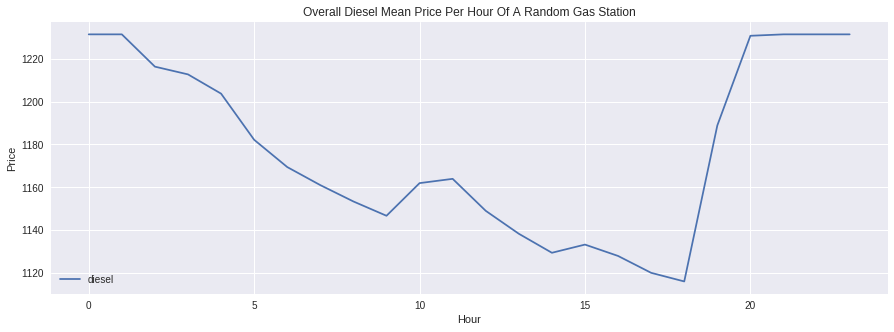

In [177]:
title = 'Overall Diesel Mean Price Per Hour Of A Random Gas Station'
tmp = pr.groupby(pd.TimeGrouper('h')).mean().fillna(method='ffill')
tmp.groupby(tmp.index.hour).mean().plot(figsize=(15,5))
plt.title(title)
plt.xlabel('Hour')
plt.ylabel('Price')
plt.savefig('build/{}.png'.format(title.replace(' ', '_')))
plt.show()

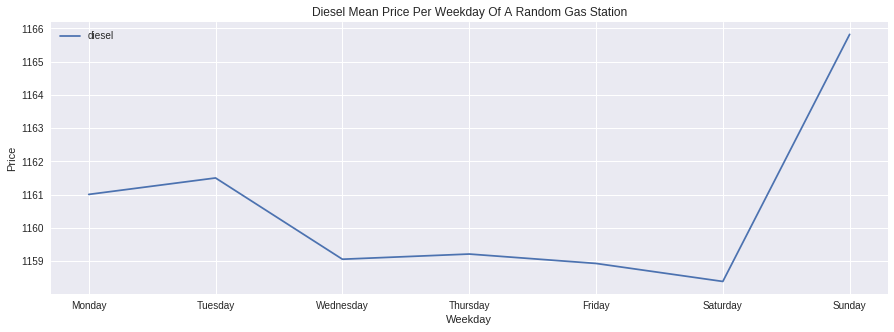

In [178]:
title = 'Diesel Mean Price Per Weekday Of A Random Gas Station'
wd = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
pr.groupby(pr.index.weekday).mean().plot(figsize=(15,5))
plt.title(title)
plt.xlabel('Weekday')
plt.ylabel('Price')
plt.xticks(range(7), [day for key, day in wd.items()])
plt.savefig('build/{}.png'.format(title.replace(' ', '_')))
plt.show()

In [238]:
cur = conn()
cur.execute("select version_time from gas_station where version_time<='2017-01-01 12:00:00' limit 10")
cur.fetchall()

[(datetime.datetime(2015, 4, 1, 13, 23, 5),),
 (datetime.datetime(2013, 7, 31, 22, 0),),
 (datetime.datetime(2016, 5, 10, 9, 17, 38),),
 (datetime.datetime(2016, 4, 3, 22, 22, 39),),
 (datetime.datetime(2014, 2, 26, 9, 41, 51),),
 (datetime.datetime(2016, 5, 23, 14, 1, 35),),
 (datetime.datetime(2015, 12, 18, 16, 29, 2),),
 (datetime.datetime(2016, 3, 30, 13, 29, 48),),
 (datetime.datetime(2016, 3, 16, 21, 2, 23),),
 (datetime.datetime(2014, 7, 17, 10, 35, 57, 370000),)]